##### Import

In [65]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

#### Generating rules & clouds

In [66]:
x1 = np.random.randint(low=0, high=50, size= 50)
x2 = np.random.randint(low=0, high=50, size= 50)
x3 = np.random.randint(low=0, high=50, size= 50)
x4 = np.random.randint(low=0, high=50, size= 50)
x5 = np.random.randint(low=0, high=50, size= 50)

In [67]:
cloud1 = np.zeros((50, 5))
cloud2 = np.zeros((50, 5))
cloud3 = np.zeros((50, 5))
cloud4 = np.zeros((50, 5))

 rule_1 = x1 ** 2 + 4 * x2 + 9 * x3 ** 2 + x4 + x5  
 rule_2 = x1 ** 3 + 5 * x2 + x3 + 3 * x4 + x5 * 8   
 rule_3 = x1 + 4 * x2 + x3 ** 3 + 23 * x4 + 5 * x5  
 rule_4 = 8 * x1 ** 2 + x2 + 4 * x3 + 10 * x4 + 3 * x5

In [68]:
for i in range(50):
    cloud1[i] = [x1[i] ** 2, 4 * x2[i], 9 * x3[i] ** 2, x4[i], x5[i]]
    cloud2[i] = [x1[i] ** 3, 5 * x2[i], x3[i], 3 * x4[i], 8 * x5[i]]
    cloud3[i] = [x1[i], 4 * x2[i], x3[i] ** 3, 23 * x4[i], 5 * x5[i]]
    cloud4[i] = [8 * x1[i] ** 2, x2[i], 4 * x3[i], 10 * x4[i], 3 * x5[i]]


#### making PCA

In [69]:
pca = PCA(n_components=2)

In [70]:
cloud1_after = pca.fit_transform(cloud1)
cloud2_after = pca.fit_transform(cloud2)
cloud3_after = pca.fit_transform(cloud3)
cloud4_after = pca.fit_transform(cloud4)

#### Visualisation

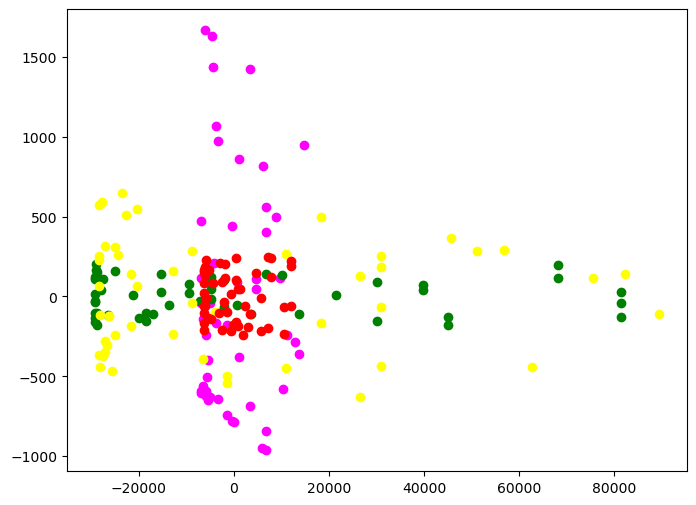

In [71]:
plt.figure(figsize=(8,6))
plt.scatter(cloud1_after[:,0], cloud1_after[:,1], c='magenta')
plt.scatter(cloud2_after[:,0], cloud2_after[:,1], c='green')
plt.scatter(cloud3_after[:,0], cloud3_after[:,1], c='yellow')
plt.scatter(cloud4_after[:,0], cloud4_after[:,1], c='red')



#### Clustering

In [72]:
from sklearn.cluster import KMeans

In [73]:
reduced_clouds = [cloud1_after, cloud2_after, cloud3_after, cloud4_after]
all_points = np.vstack(reduced_clouds)

In [74]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(all_points)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7ca1d6523380>
Traceback (most recent call last):
  File "/home/annya/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/annya/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/annya/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
                   ^^^^^^^^^^^^^^^^^^
  File "/home/annya/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
             ^^^^^^^^^^^^^^^^^^
AttributeError: 'NoneType' object has no attribut

KMeans(n_clusters=4)

In [75]:
labels = kmeans.labels_
labels

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 0, 0, 1, 0, 3, 0, 3, 0, 1, 0, 0, 0, 3, 3, 3, 3,
       1, 1, 3, 0, 2, 0, 3, 0, 0, 0, 2, 0, 1, 3, 0, 0, 0, 0, 2, 0, 1, 2,
       0, 0, 0, 1, 3, 3, 2, 0, 0, 3, 3, 0, 1, 2, 1, 3, 0, 0, 0, 0, 3, 0,
       3, 0, 2, 2, 0, 1, 1, 1, 3, 0, 2, 1, 0, 0, 0, 0, 3, 0, 0, 1, 0, 0,
       3, 0, 0, 3, 0, 0, 1, 0, 0, 1, 3, 1, 0, 0, 0, 2, 0, 0, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3], dtype=int32)

#### Visualisation Clustering

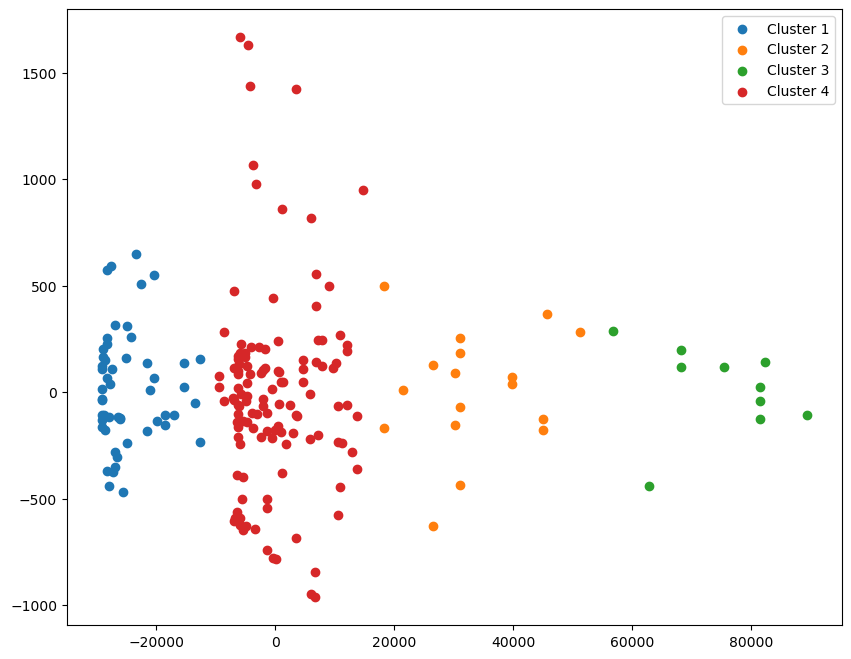

In [76]:
plt.figure(figsize=(10, 8))
for i in range(4):
    plt.scatter(all_points[labels == i, 0], all_points[labels == i, 1], label=f'Cluster {i+1}')

plt.legend()

Кластеризация разделила точки по-другому.

#### Optimal

In [77]:
sse = []

In [78]:
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(all_points)
    sse.append(kmeans.inertia_)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7ca1d6f20540>
Traceback (most recent call last):
  File "/home/annya/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/annya/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/annya/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
                   ^^^^^^^^^^^^^^^^^^
  File "/home/annya/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
             ^^^^^^^^^^^^^^^^^^
AttributeError: 'NoneType' object has no attribut

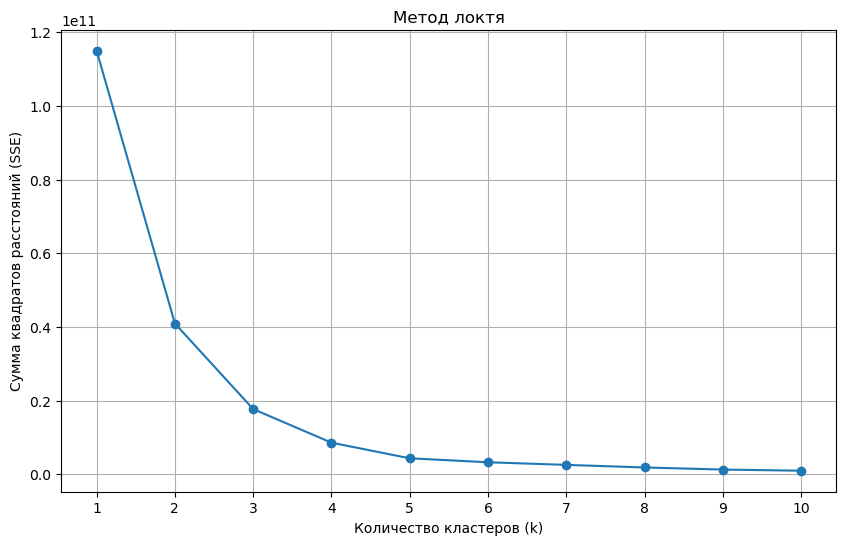

In [79]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, sse, marker='o')
plt.title('Метод локтя')
plt.xlabel('Количество кластеров (k)')
plt.ylabel('Сумма квадратов расстояний (SSE)')
plt.xticks(k_values)
plt.grid()
plt.show()


In [80]:
kmeans = KMeans(n_clusters=3, n_init=10)
kmeans.fit(all_points)
labels = kmeans.labels_

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7ca1d6259080>
Traceback (most recent call last):
  File "/home/annya/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/annya/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/annya/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
                   ^^^^^^^^^^^^^^^^^^
  File "/home/annya/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
             ^^^^^^^^^^^^^^^^^^
AttributeError: 'NoneType' object has no attribut

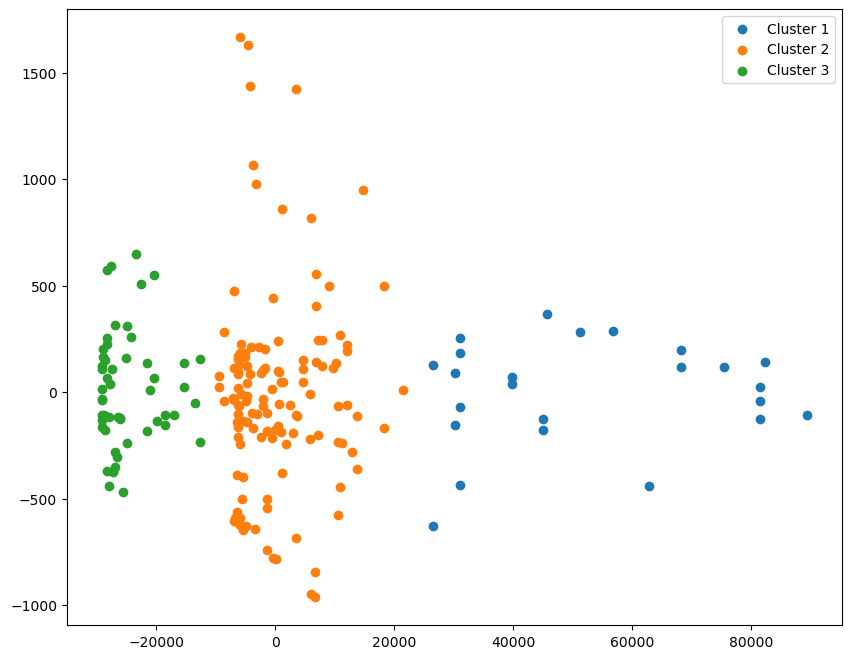

In [81]:
plt.figure(figsize=(10, 8))
for i in range(3):
    plt.scatter(all_points[labels == i, 0], all_points[labels == i, 1], label=f'Cluster {i+1}')

plt.legend()

#### Addition  
А что если попробовать на трехмерном пространстве и сравнить с L1-регуляризацией, когда мы убираем один из параметров?

In [82]:
from sklearn.feature_selection import SelectFromModel
from sklearn import linear_model

In [83]:
clf = linear_model.Lasso()
sfm = SelectFromModel(estimator=clf, max_features=2) 

In [84]:
clf.fit(cloud1,cloud1)
cloud1_after_lasso = sfm.transform(cloud1)

clf.fit(cloud2,cloud2)
cloud2_after_lasso = sfm.transform(cloud2)

clf.fit(cloud3,cloud3)
cloud3_after_lasso = sfm.transform(cloud3)

clf.fit(cloud4,cloud4)
cloud4_after_lasso = sfm.transform(cloud4)

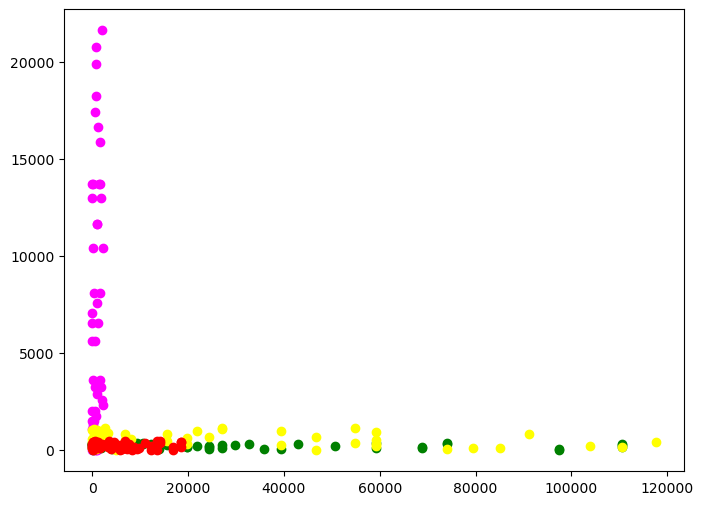

In [85]:
plt.figure(figsize=(8,6))
plt.scatter(cloud1_after_lasso[:,0], cloud1_after_lasso[:,1], c='magenta')
plt.scatter(cloud2_after_lasso[:,0], cloud2_after_lasso[:,1], c='green')
plt.scatter(cloud3_after_lasso[:,0], cloud3_after_lasso[:,1], c='yellow')
plt.scatter(cloud4_after_lasso[:,0], cloud4_after_lasso[:,1], c='red')

#### Вывод
Можно заметить, что графики поменялись лишь в масштабировании и смещении относительно осей, однако относительно друг друга они приблизительно сохранили свое положение. Однако график с PCA более репрезентативен по сравнению с графиком L1. Таким образом, можно сделать вывод, что PCA оптимально выбрало компоненты и облака, созданные по разным правилам не наложились друг на друга. Разница с отображением L1 может быть связана с разным подходом внутри данных функций и разной стандартизации значений при вычислении.